In [1]:
import numpy as np
import pandas as pd
import os
import glob
import shutil
from IPython.display import clear_output

summary_files = glob.glob('../../../aldd_results/params_results_exp_1/*/*/*/*/')

In [2]:
successful_jobs = []
failed_jobs = []

all_0 = []
all_1 = []
all_2 = []
for i, sf in enumerate(summary_files):
    clear_output()
    print('{}/{}'.format(i, len(summary_files)))
    sf_splits = sf.split('\\')
    hs_group = sf_splits[1]
    hs_id = sf_splits[2]
    rf_id = sf_splits[3]
    batch_size = sf_splits[4]
    
    batch_cpds = glob.glob(sf+'iter_*\expl*.csv')
    if len(batch_cpds) > 0:
        cpd_df = pd.concat([pd.read_csv(x) for x in batch_cpds])
    
        if cpd_df.shape[0] == 10*int(batch_size.split('_')[-1]):
            assert cpd_df['Index ID'].unique().shape[0] == 10*int(batch_size.split('_')[-1])
            successful_jobs.append('{}_rf_{}_{}'.format(hs_id, rf_id, batch_size))
        else:
            failed_jobs.append('{}_rf_{}_{}'.format(hs_id, rf_id, batch_size))
            continue
    else:
        failed_jobs.append('{}_rf_{}_{}'.format(hs_id, rf_id, batch_size))
        continue
    
    des_cols = ['iter_num', 
                'exploitation_hits', 'exploitation_max_hits', 'exploitation_batch_size',
                'exploration_hits', 'exploration_max_hits', 'exploration_batch_size',
                'total_hits', 'total_max_hits', 'total_batch_size']
    summary_df = pd.read_csv(sf+'\summary.csv')
    summary_df = summary_df[des_cols]
    summary_df['rf_id'] = rf_id
    summary_df['hs_id'] = hs_id
    summary_df['batch_size'] = int(batch_size.split('_')[-1])
    summary_df['hs_group'] = hs_group
    
    if int(batch_size.split('_')[-1]) == 96:
        all_0.append(summary_df)
    elif int(batch_size.split('_')[-1]) == 384:
        all_1.append(summary_df)
    else:
        all_2.append(summary_df)

all_0 = pd.concat(all_0)
all_1 = pd.concat(all_1)
all_2 = pd.concat(all_2)

545/546


In [3]:
print('Total jobs: {}'.format(len(successful_jobs) + len(failed_jobs)))
print('Failed jobs: {}'.format(len(failed_jobs)))
print('Successful jobs: {}'.format(len(successful_jobs)))

Total jobs: 546
Failed jobs: 232
Successful jobs: 314


In [51]:
def get_summary(all_df):
    temp_df = all_df[all_df['iter_num'] == 9999][['exploitation_hits', 'exploration_hits', 'total_hits', 'hs_id', 'hs_group']]
    temp_df['hs_id'] = temp_df['hs_id'] + '_' + temp_df['hs_group']
    top_df = temp_df.groupby('hs_id').mean()
    top_df.columns = [x+'_mean' for x in top_df.columns]
    top_df['total_hits_std'] = temp_df[['total_hits', 'hs_id']].groupby('hs_id').std()
    top_df['run_counts'] = temp_df[['total_hits', 'hs_id']].groupby('hs_id').count()
    top_df = top_df.sort_values('total_hits_mean', ascending=False)
    return top_df

top_0 = get_summary(all_0)
top_0

,exploitation_hits_mean,exploration_hits_mean,total_hits_mean,total_hits_std,run_counts
hs_id,,,,,
ClusterBasedWCSelector_201_top_1536,0.400000,140.400000,140.800000,44.424218,10
ClusterBasedWCSelector_444_top_1536,11.888889,125.333333,137.222222,56.308920,9
ClusterBasedWCSelector_533_top_1536,1.428571,122.000000,123.428571,64.422711,7
ClusterBasedWCSelector_227_top_1536,0.000000,122.333333,122.333333,71.592365,6
ClusterBasedWCSelector_55_top_384,0.000000,119.888889,119.888889,33.194293,9
ClusterBasedWCSelector_491_top_1536,0.000000,117.500000,117.500000,73.901479,8
ClusterBasedWCSelector_411_top_384,0.000000,117.222222,117.222222,65.663494,9
ClusterBasedWCSelector_572_top_1536,12.000000,97.000000,109.000000,68.791611,8
ClusterBasedWCSelector_563_top_1536,11.714286,89.714286,101.428571,71.346238,7


In [49]:
a = all_0[all_0['hs_id'].isin(['_'.join(x.split('_')[:2]) for x in top_0.index[:3]])]
a = a[['hs_id', 'iter_num', 'rf_id', 'exploitation_hits', 'exploration_hits', 'total_hits', 'hs_group']]
a[a['iter_num'] == 9999].sort_values(['hs_id', 'total_hits'], ascending=False)

,hs_id,iter_num,rf_id,exploitation_hits,exploration_hits,total_hits,hs_group
10,ClusterBasedWCSelector_533,9999.0,1338,1.0,169.0,170.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,2233,0.0,167.0,167.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,1017,0.0,166.0,166.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,1179,0.0,162.0,162.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,3845,1.0,124.0,125.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,1069,8.0,65.0,73.0,top_1536
10,ClusterBasedWCSelector_533,9999.0,2053,0.0,1.0,1.0,top_1536
10,ClusterBasedWCSelector_444,9999.0,1179,10.0,159.0,169.0,top_1536
10,ClusterBasedWCSelector_444,9999.0,2233,14.0,154.0,168.0,top_1536
10,ClusterBasedWCSelector_444,9999.0,2053,14.0,153.0,167.0,top_1536


In [52]:
top_1 = get_summary(all_1)
top_1

,exploitation_hits_mean,exploration_hits_mean,total_hits_mean,total_hits_std,run_counts
hs_id,,,,,
ClusterBasedWCSelector_411_top_384,0.000000,225.800000,225.800000,15.319922,5
ClusterBasedWCSelector_227_top_1536,0.000000,218.833333,218.833333,10.419533,6
ClusterBasedWCSelector_609_top_1536,0.000000,217.666667,217.666667,20.324042,6
ClusterBasedWCSelector_444_top_1536,12.800000,199.000000,211.800000,12.235195,5
ClusterBasedWCSelector_572_top_1536,22.000000,184.333333,206.333333,17.397318,6
ClusterBasedWCSelector_533_top_1536,3.250000,202.375000,205.625000,15.546589,8
ClusterBasedWCSelector_491_top_1536,0.000000,201.900000,201.900000,6.640783,10
ClusterBasedWCSelector_563_top_1536,8.500000,193.000000,201.500000,14.658006,8
ClusterBasedWCSelector_55_top_384,0.000000,201.000000,201.000000,NaN,1


In [53]:
top_2 = get_summary(all_2)
top_2

,exploitation_hits_mean,exploration_hits_mean,total_hits_mean,total_hits_std,run_counts
hs_id,,,,,
ClusterBasedWCSelector_734_middle_1536,0.0,48.6,48.6,5.719363,10


---
# Plots

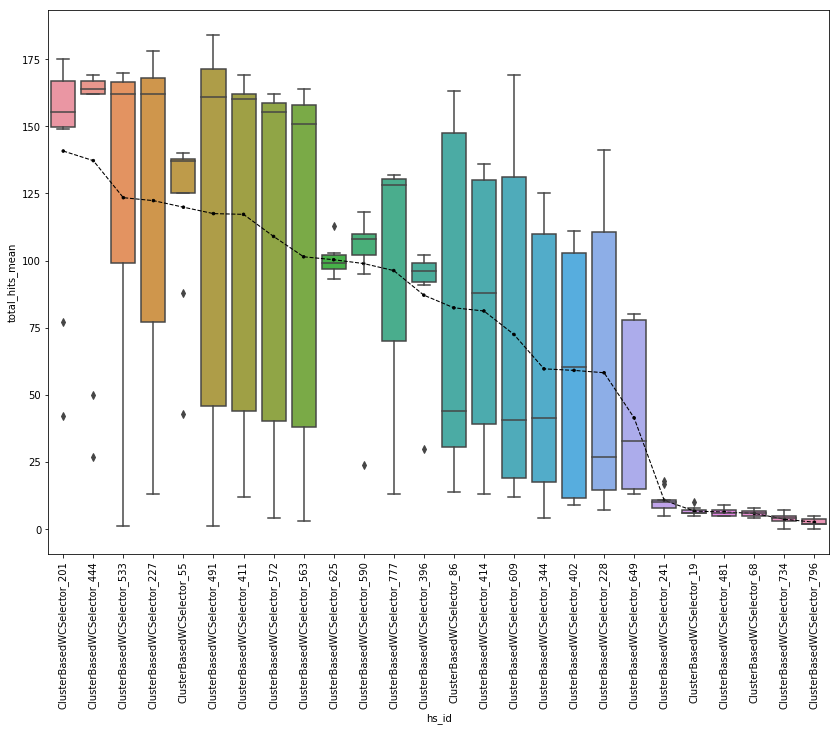

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

top_0['hs_id'] = ['_'.join(x.split('_')[:2]) for x in top_0.index]
all_0.index = all_0['hs_id']

plt.figure(figsize=(14, 10))
sns.boxplot(x="hs_id", y="total_hits", data=all_0[all_0['iter_num'] == 9999].loc[list(top_0['hs_id']),:])
sns.pointplot(x="hs_id", y="total_hits_mean", data=top_0, linestyles='--', scale=0.4, 
              color='k', errwidth=0, capsize=0)

plt.xticks(rotation=90)
plt.show()

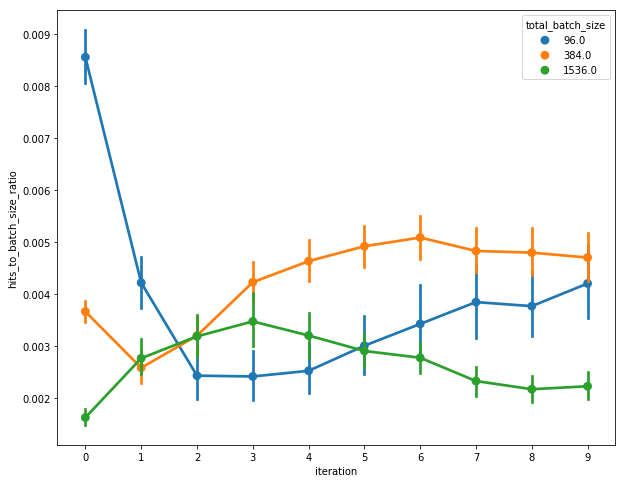

In [10]:
plt.figure(figsize=(10, 8))
#sns.boxplot(x="iteration", y="hits_to_batch_size_ratio", data=all_0)
sns.pointplot(x="iteration", y="hits_to_batch_size_ratio", hue="total_batch_size", data=all_df.drop('total'))
plt.show()

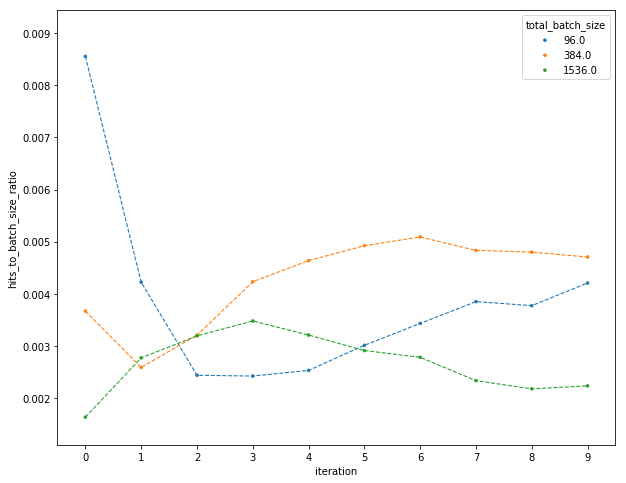

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.pointplot(x="iteration", y="hits_to_batch_size_ratio", hue="total_batch_size", 
              data=all_df.drop('total'), linestyles='--', scale=0.4, errwidth=0, capsize=0)
plt.show()

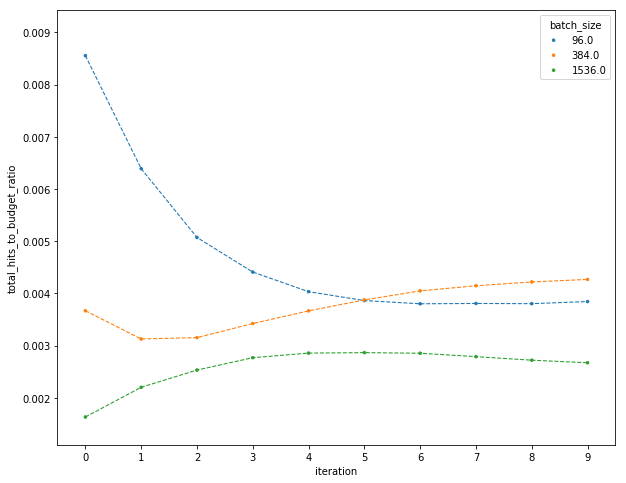

In [12]:
running_sum = all_df.drop('total').groupby('hyperparameter_id').cumsum(axis=0)
running_sum['total_hits_to_budget_ratio'] = running_sum['total_hits'] / running_sum['total_batch_size']
running_sum['batch_size'] = all_df.drop('total')['total_batch_size']
running_sum['iteration'] = all_df.drop('total')['iteration']

plt.figure(figsize=(10, 8))
sns.pointplot(x="iteration", y="total_hits_to_budget_ratio", hue="batch_size", 
              data=running_sum, 
              linestyles='--', scale=0.4, errwidth=0, capsize=0)
plt.show()

---
# In-Depth

In [13]:
top_hs_0 = all_0[all_0['iteration'] == 9999].sort_values('total_hits')
top_hs_0 = top_hs_0[top_hs_0['total_hits'] >= np.quantile(top_hs_0['total_hits'], 0.98)]
top_hs_0 = top_hs_0.reset_index(drop=True)

top_hs_1 = all_1[all_1['iteration'] == 9999].sort_values('total_hits')
top_hs_1 = top_hs_1[top_hs_1['total_hits'] >= np.quantile(top_hs_1['total_hits'], 0.95)]
top_hs_1 = top_hs_1.reset_index(drop=True)

top_hs_2 = all_2[all_2['iteration'] == 9999].sort_values('total_hits')
top_hs_2 = top_hs_2[top_hs_2['total_hits'] >= np.quantile(top_hs_2['total_hits'], 0.98)]
top_hs_2 = top_hs_2.reset_index(drop=True)

In [29]:
top_hs_0 = all_0[all_0['iteration'] == 9999].sort_values('total_hits')
top_hs_0 = top_hs_0.reset_index(drop=True)

top_hs_1 = all_1[all_1['iteration'] == 9999].sort_values('total_hits')
top_hs_1 = top_hs_1.reset_index(drop=True)

top_hs_2 = all_2[all_2['iteration'] == 9999].sort_values('total_hits')
top_hs_2 = top_hs_2.reset_index(drop=True)

In [33]:
top_hs_0.iloc[-15:,:][['exploitation_batch_size', 'exploration_batch_size', 
                       'exploitation_hits', 'exploration_hits',
                       'total_hits']]

,exploitation_batch_size,exploration_batch_size,exploitation_hits,exploration_hits,total_hits
656,465.0,495.0,14.0,1.0,15.0
657,187.0,773.0,12.0,3.0,15.0
658,0.0,960.0,0.0,15.0,15.0
659,0.0,960.0,0.0,16.0,16.0
660,0.0,960.0,0.0,17.0,17.0
661,437.0,523.0,17.0,1.0,18.0
662,957.0,3.0,18.0,0.0,18.0
663,393.0,567.0,17.0,1.0,18.0
664,226.0,734.0,10.0,8.0,18.0
665,0.0,960.0,0.0,19.0,19.0


In [35]:
top_hs_1.iloc[-15:,:][['exploitation_batch_size', 'exploration_batch_size', 
                       'exploitation_hits', 'exploration_hits',
                       'total_hits']]

,exploitation_batch_size,exploration_batch_size,exploitation_hits,exploration_hits,total_hits
622,0.0,3840.0,0.0,43.0,43.0
623,1810.0,2030.0,39.0,4.0,43.0
624,1871.0,1969.0,38.0,5.0,43.0
625,2171.0,1669.0,40.0,3.0,43.0
626,0.0,3840.0,0.0,44.0,44.0
627,0.0,3840.0,0.0,44.0,44.0
628,0.0,3840.0,0.0,45.0,45.0
629,0.0,3840.0,0.0,45.0,45.0
630,0.0,3840.0,0.0,46.0,46.0
631,0.0,3840.0,0.0,47.0,47.0


In [37]:
top_hs_2.iloc[-15:,:][['exploitation_batch_size', 'exploration_batch_size', 
                       'exploitation_hits', 'exploration_hits',
                       'total_hits']]

,exploitation_batch_size,exploration_batch_size,exploitation_hits,exploration_hits,total_hits
180,7352.0,8008.0,75.0,8.0,83.0
181,7460.0,7900.0,72.0,11.0,83.0
182,7562.0,7798.0,72.0,11.0,83.0
183,0.0,15360.0,0.0,83.0,83.0
184,2.0,15358.0,2.0,84.0,86.0
185,0.0,15360.0,0.0,86.0,86.0
186,0.0,15360.0,0.0,87.0,87.0
187,0.0,15360.0,0.0,87.0,87.0
188,8044.0,7316.0,78.0,11.0,89.0
189,0.0,15360.0,0.0,91.0,91.0


---
### DTK tests for hyperparameters
Null Hypothesis: Groups have same mean.

If confidence interval does not contain 0, then we REJECT null hypothesis; i.e. groups do not have same mean.

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

# Null Hypothesis: Groups have same mean
# If confidence interval does not contain 0, then we REJECT null hypothesis

dtk_lib = rpackages.importr('DTK')
alpha=0.05

def get_important_hs(top_hs):
    config_df = pd.concat([pd.read_csv(x) for x in top_hs['config_file']])
    config_df = config_df.reset_index(drop=True)
    req_cols = config_df.columns[2:-4]

    dtk_dict = {}
    for c in req_cols:
        df = pd.concat([top_hs['total_hits'], config_df[c]], axis=1)

        group_names = list(np.sort(df[c].unique()))
        group_means = df.groupby(c).mean()
        index_names_1 = []
        index_names_2 = []
        mean1 = []
        mean2 = []
        for i in range(len(group_names)):
            for j in range(i+1, len(group_names)):
                index_names_1.append(group_names[j])
                index_names_2.append(group_names[i])
                mean1.append(group_means.iloc[j,0])
                mean2.append(group_means.iloc[i,0])

        m_df_mat = np.around(df['total_hits'].as_matrix(), decimals=4)
        dtk_results_init = dtk_lib.DTK_test(robjects.FloatVector(m_df_mat), robjects.FactorVector(df[c].tolist()), alpha)
        dtk_results = np.array(dtk_results_init[1])        
        dtk_pd = pd.DataFrame(data=[index_names_1, index_names_2, 
                                    list(mean1), list(mean2),
                                    list(dtk_results[:,0]),list(dtk_results[:,1]),
                                    list(dtk_results[:,2]), [False for _ in range(len(index_names_1))]]).T
        dtk_pd.columns = ['group1', 'group2', 'mean1', 'mean2', 'meandiff', 'Lower CI', 'Upper CI', 'reject']
        for j in range(dtk_pd.shape[0]):      
            if dtk_pd.loc[j,'Lower CI'] > 0 or dtk_pd.loc[j,'Upper CI'] < 0:
                dtk_pd.loc[j,'reject'] = True

        if True in list(dtk_pd['reject']):
            dtk_dict[c] = dtk_pd

    important_hs = {}
    for k in dtk_dict:
        dtk_pd = dtk_dict[k]
        g1_max = dtk_pd[dtk_pd['mean1'] == dtk_pd['mean1'].max()].iloc[0,:]
        g2_max = dtk_pd[dtk_pd['mean2'] == dtk_pd['mean2'].max()].iloc[0,:]
        if g1_max['mean1'] > g2_max['mean2']:
            important_hs[k] = g1_max['group1']
        else:
            important_hs[k] = g1_max['group2']
            
    return important_hs

In [15]:
top_hs_0 = all_0[all_0['iteration'] == 9999].sort_values('total_hits')
top_hs_0 = top_hs_0.reset_index(drop=True)
important_hs_0 = get_important_hs(top_hs_0)

top_hs_1 = all_1[all_1['iteration'] == 9999].sort_values('total_hits')
top_hs_1 = top_hs_1.reset_index(drop=True)
important_hs_1 = get_important_hs(top_hs_1)

top_hs_2 = all_2[all_2['iteration'] == 9999].sort_values('total_hits')
top_hs_2 = top_hs_2.reset_index(drop=True)
important_hs_2 = get_important_hs(top_hs_2)

C:\Users\Moeman\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Moeman\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\Users\Moeman\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [16]:
for c in req_cols:
    df = pd.concat([top_hs['total_hits'], config_df[c]], axis=1)
    values = list(df[c].unique())
    print(c)
    for x in values:
        sns.distplot(df[df[c] == x]['total_hits'])
    plt.legend(values)
    plt.show()
    
    print('--------------------------------------------')

NameError: name 'req_cols' is not defined

In [17]:
top_hs_0 = all_0[all_0['iteration'] == 9999].sort_values('total_hits')
top_hs_0 = top_hs_0.reset_index(drop=True)

top_hs_1 = all_1[all_1['iteration'] == 9999].sort_values('total_hits')
top_hs_1 = top_hs_1.reset_index(drop=True)

top_hs_2 = all_2[all_2['iteration'] == 9999].sort_values('total_hits')
top_hs_2 = top_hs_2.reset_index(drop=True)

---
# Prepare config files for Experiment 1
Run the top-15, middle-5, and bottom-5 hyperparameters from each batch size with different starting initial 96 plate.
Number of different initial starts: 10.
Total of (45+15+15)(hyperparams)\*3(batch_sizes)\*10(initial plates) = 2250 jobs

In [55]:
import pathlib
import json

top_hs_0 = all_0[all_0['iteration'] == 9999].sort_values('total_hits')
top_hs_0 = top_hs_0.reset_index(drop=True)

top_hs_1 = all_1[all_1['iteration'] == 9999].sort_values('total_hits')
top_hs_1 = top_hs_1.reset_index(drop=True)

top_hs_2 = all_2[all_2['iteration'] == 9999].sort_values('total_hits')
top_hs_2 = top_hs_2.reset_index(drop=True)

config_dir = '../param_configs/first_pass_hyperparams/top/batch_size_{}/'
for bsize, top_hs in zip([96, 384, 1536], 
                         [top_hs_0.iloc[-15:,:], top_hs_1.iloc[-15:,:], top_hs_2.iloc[-15:,:]]):
    cf_dir = config_dir.format(bsize)
    pathlib.Path(cf_dir).mkdir(parents=True, exist_ok=True)
        
    config_files = top_hs['config_file']
    hs_ids = top_hs['hyperparameter_id'].apply((lambda x: '_'.join(x.split('_')[2:4])))
    for hid, cf in zip(hs_ids, config_files):
        cdf = pd.read_csv(cf)
        cdf = cdf.iloc[0].to_dict()
        cdf['batch_size'] = [96, 384, 1536]
        cdf['hyperparameter_id'] = hid
        cdf['hyperparameter_group'] = 'top_{}'.format(bsize)
        
        for k in cdf:
            if type(cdf[k]) == np.bool_:
                cdf[k] = bool(cdf[k])
            elif type(cdf[k]) == np.int64:
                cdf[k] = int(cdf[k])
            elif type(cdf[k]) == np.float64:
                cdf[k] = float(cdf[k])  
        with open(cf_dir + hid+'.json', 'w') as f:
            json.dump(cdf, f)

config_dir = '../param_configs/first_pass_hyperparams/middle/batch_size_{}/'
for bsize, top_hs in zip([96, 384, 1536], 
                         [top_hs_0.iloc[-150:-150+5], top_hs_1.iloc[-150:-150+5], top_hs_2.iloc[-100:-100+5]]):
    cf_dir = config_dir.format(bsize)
    pathlib.Path(cf_dir).mkdir(parents=True, exist_ok=True)
        
    config_files = top_hs['config_file']
    hs_ids = top_hs['hyperparameter_id'].apply((lambda x: '_'.join(x.split('_')[2:4])))
    for hid, cf in zip(hs_ids, config_files):
        cdf = pd.read_csv(cf)
        cdf = cdf.iloc[0].to_dict()
        cdf['batch_size'] = [96, 384, 1536]
        cdf['hyperparameter_id'] = hid
        cdf['hyperparameter_group'] = 'middle_{}'.format(bsize)
        
        
        for k in cdf:
            if type(cdf[k]) == np.bool_:
                cdf[k] = bool(cdf[k])
            elif type(cdf[k]) == np.int64:
                cdf[k] = int(cdf[k])
            elif type(cdf[k]) == np.float64:
                cdf[k] = float(cdf[k])  
        with open(cf_dir + hid+'.json', 'w') as f:
            json.dump(cdf, f)
            
config_dir = '../param_configs/first_pass_hyperparams/worst/batch_size_{}/'
for bsize, top_hs in zip([96, 384, 1536], 
                         [top_hs_0.iloc[:5,:], top_hs_1.iloc[:5,:], top_hs_2.iloc[:5,:]]):
    cf_dir = config_dir.format(bsize)
    pathlib.Path(cf_dir).mkdir(parents=True, exist_ok=True)
        
    config_files = top_hs['config_file']
    hs_ids = top_hs['hyperparameter_id'].apply((lambda x: '_'.join(x.split('_')[2:4])))
    for hid, cf in zip(hs_ids, config_files):
        cdf = pd.read_csv(cf)
        cdf = cdf.iloc[0].to_dict()
        cdf['batch_size'] = [96, 384, 1536]
        cdf['hyperparameter_id'] = hid
        cdf['hyperparameter_group'] = 'worst_{}'.format(bsize)
        
        
        for k in cdf:
            if type(cdf[k]) == np.bool_:
                cdf[k] = bool(cdf[k])
            elif type(cdf[k]) == np.int64:
                cdf[k] = int(cdf[k])
            elif type(cdf[k]) == np.float64:
                cdf[k] = float(cdf[k])  
        with open(cf_dir + hid+'.json', 'w') as f:
            json.dump(cdf, f)

In [58]:
csv_files = glob.glob('../datasets/aid624173_cv_96/*.csv')
files_with_actives = []
for c in csv_files:
    df = pd.read_csv(c)
    if df['pcba-aid624173'].sum() > 0:
        files_with_actives.append(c)
files_with_actives = [f for f in files_with_actives if 'unlabeled_10.csv' not in f]
random_active_files = list(np.random.choice(files_with_actives, size=10, replace=False))

In [88]:
df = pd.read_csv('../datasets/pcba/aid624173.csv')

In [90]:
df['BT_0.4 ID'].unique().shape

(78058,)

In [3]:
import pathlib, os, shutil, glob
import json
import pandas as pd
import numpy as np

random_active_files =['../datasets/aid624173_cv_96/unlabeled_1338.csv',
                      '../datasets/aid624173_cv_96/unlabeled_424.csv',
                      '../datasets/aid624173_cv_96/unlabeled_3845.csv',
                      '../datasets/aid624173_cv_96/unlabeled_1179.csv',
                      '../datasets/aid624173_cv_96/unlabeled_2233.csv',
                      '../datasets/aid624173_cv_96/unlabeled_1069.csv',
                      '../datasets/aid624173_cv_96/unlabeled_2053.csv',
                      '../datasets/aid624173_cv_96/unlabeled_3303.csv',
                      '../datasets/aid624173_cv_96/unlabeled_1017.csv',
                      '../datasets/aid624173_cv_96/unlabeled_150.csv']
hparams_files = glob.glob('../param_configs/first_pass_hyperparams/*/*.json')

In [3]:
import pandas as pd
import glob
a = glob.glob('../params_results/ClusterBasedWCSelector_55/1338/batch_size_96/iter_*/expl*.csv')
print(a)
df = pd.concat([pd.read_csv(x) for x in a])

['../params_results/ClusterBasedWCSelector_19/1338/batch_size_96\\iter_0\\exploration.csv', '../params_results/ClusterBasedWCSelector_19/1338/batch_size_96\\iter_1\\exploration.csv']


In [3]:
df['pcba-aid624173'].sum(), df.shape

(78.0, (288, 6))

In [4]:
b = glob.glob('../params_results/ClusterBasedWCSelector_19/1338/batch_size_96/training_data/iter*.csv')
[pd.read_csv(x)['pcba-aid624173'].sum() for x in b]

[1.0, 2.0, 0.0]

In [7]:
s = pd.read_csv('../params_results/ClusterBasedWCSelector_19/1338/batch_size_96/summary.csv')
s

,iter_num,exploitation_hits,exploitation_max_hits,exploitation_cluster_hits,exploitation_max_cluster_hits,exploitation_novel_hits,exploitation_max_novel_hits,exploitation_batch_size,exploitation_batch_cost,exploration_hits,...,total_EF 1.0% ratio,total_EF 2.0% ratio,total_EF 5.0% ratio,total_EF 10.0% ratio,total_EF 20.0% ratio,total_MAX EF 1.0% ratio,total_MAX EF 2.0% ratio,total_MAX EF 5.0% ratio,total_MAX EF 10.0% ratio,total_MAX EF 20.0% ratio
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,2.5,0.0,25.0,20.0,10.0,5.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,2.5,0.0,25.0,20.0,10.0,5.0


In [9]:
s['screening_time_per_batch']

0    3600.0
1    3600.0
2    7200.0
Name: screening_time_per_batch, dtype: float64